 ## Mutual Information mesure la quantité d'information que les variables d'entrée contiennent sur la variable cible.
 
 ## Mutual_information(X, Y) = H(X) + H(Y) − H(X,Y)
    * H(X) -> degré d'incertutude de X
    * H(Y) -> degré d'incertitude de Y
    * H(X, Y) -> degré d'incertitude combineé de X et Y,
            si X et Y indépendante alors H(X, Y) = H(X) + H(Y)
            Donc Mutual_information -> vers 0
 ## Mutual information -> vaut 0 si les variables sont indépendantes.
 ### 
 


# Comparison of F-test and mutual information

This example illustrates the differences between univariate F-test statistics
and mutual information.

We consider 3 features x_1, x_2, x_3 distributed uniformly over [0, 1], the
target depends on them as follows:

y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1), that is the third feature is
completely irrelevant.

The code below plots the dependency of y against individual x_i and normalized
values of univariate F-tests statistics and mutual information.

As F-test captures only linear dependency, it rates x_1 as the most
discriminative feature. On the other hand, mutual information can capture any
kind of dependency between variables and it rates x_2 as the most
discriminative feature, which probably agrees better with our intuitive
perception for this example. Both methods correctly mark x_3 as irrelevant.


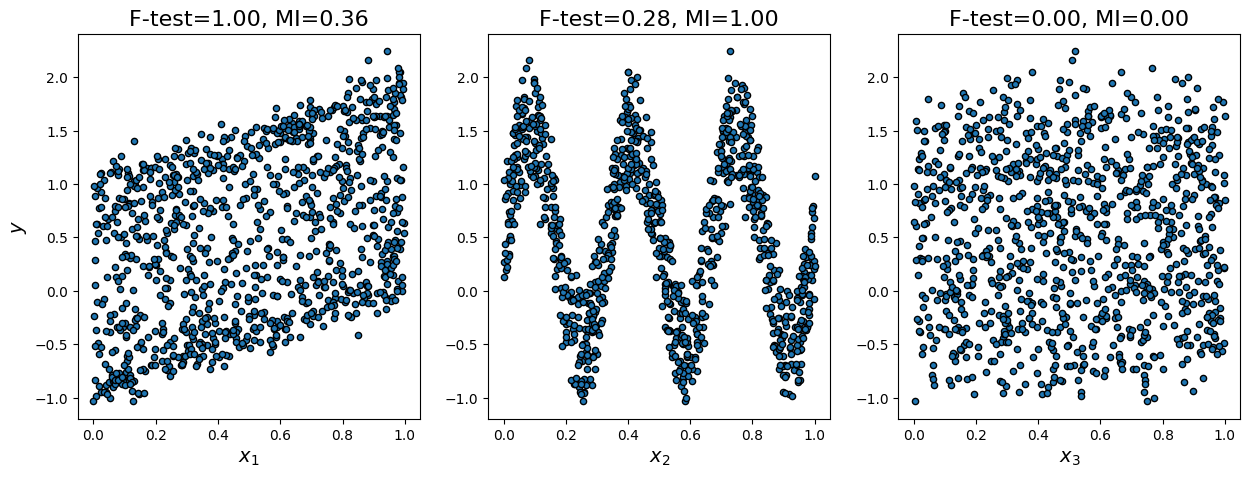

In [80]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3) # crée 1000 enregistrements de 3 colonnes
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()

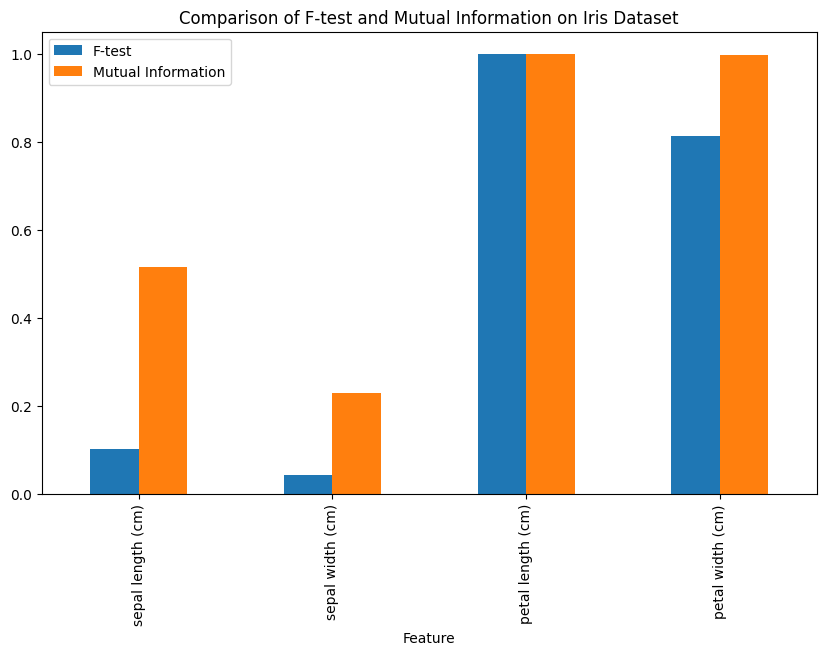

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif, mutual_info_classif

data = load_iris()
X = data.data
y = data.target

f_values, a = f_classif(X, y)
mi_values = mutual_info_classif(X, y)

f_values /= np.max(f_values)
mi_values /= np.max(mi_values)

df = pd.DataFrame({'Feature': data.feature_names,'F-test': f_values,'Mutual Information': mi_values})

df.plot(x='Feature', y=['F-test', 'Mutual Information'], kind='bar', figsize=(10, 6))
plt.title('Comparison of F-test and Mutual Information on Iris Dataset')
plt.show()


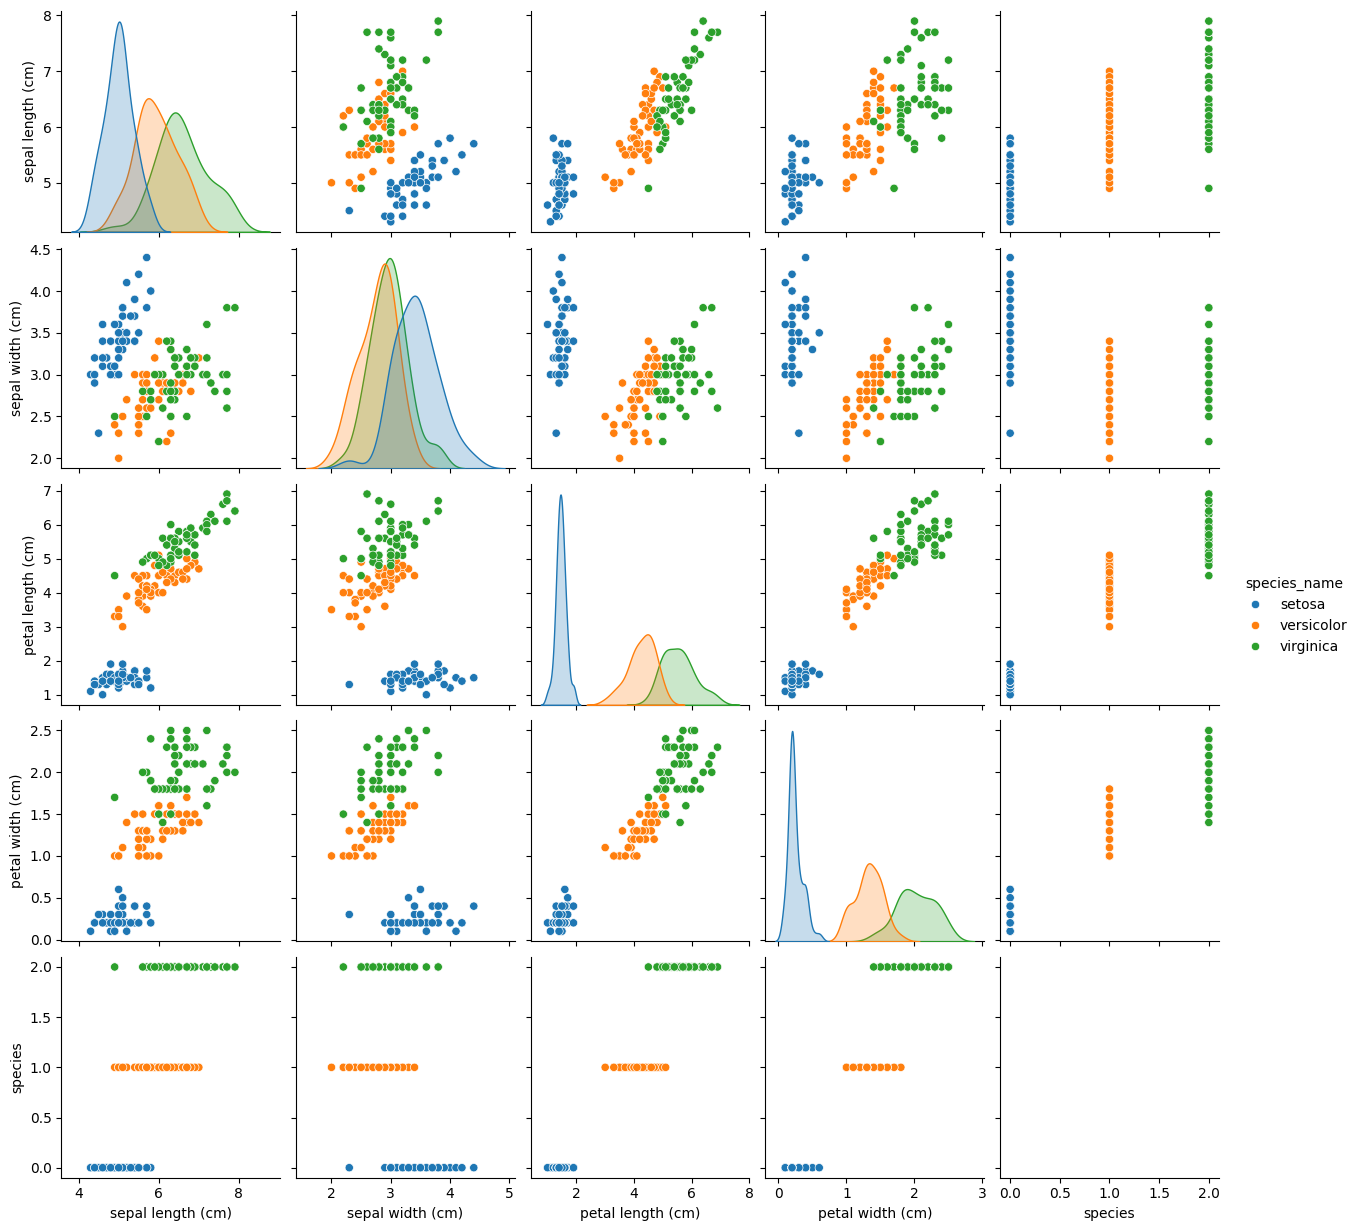

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species_name'] = df['species'].map(species_mapping)
sns.pairplot(df, hue='species_name', diag_kind='kde')
plt.show()


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# ['sepal length (cm)',
#  'sepal width (cm)',
#  'petal length (cm)',
# 'petal width (cm)']
# on prend petal length -> feature choisi par Mutual information !
X = data.data[:, 2].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, target_names=data.target_names)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [105]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

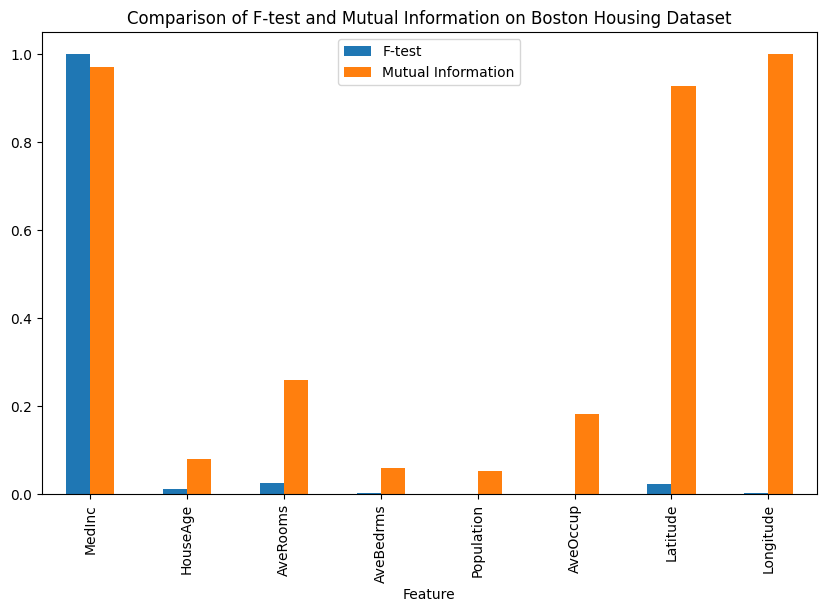

In [71]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import f_regression, mutual_info_regression

data = fetch_california_housing()
X = data.data
y = data.target

f_values, a = f_regression(X, y)
mi_values = mutual_info_regression(X, y)

f_values /= np.max(f_values)
mi_values /= np.max(mi_values)

df = pd.DataFrame({'Feature': data.feature_names,'F-test': f_values,'Mutual Information': mi_values})
df.plot(x='Feature', y=['F-test', 'Mutual Information'], kind='bar', figsize=(10, 6))
plt.title('Comparison of F-test and Mutual Information on Boston Housing Dataset')
plt.show()


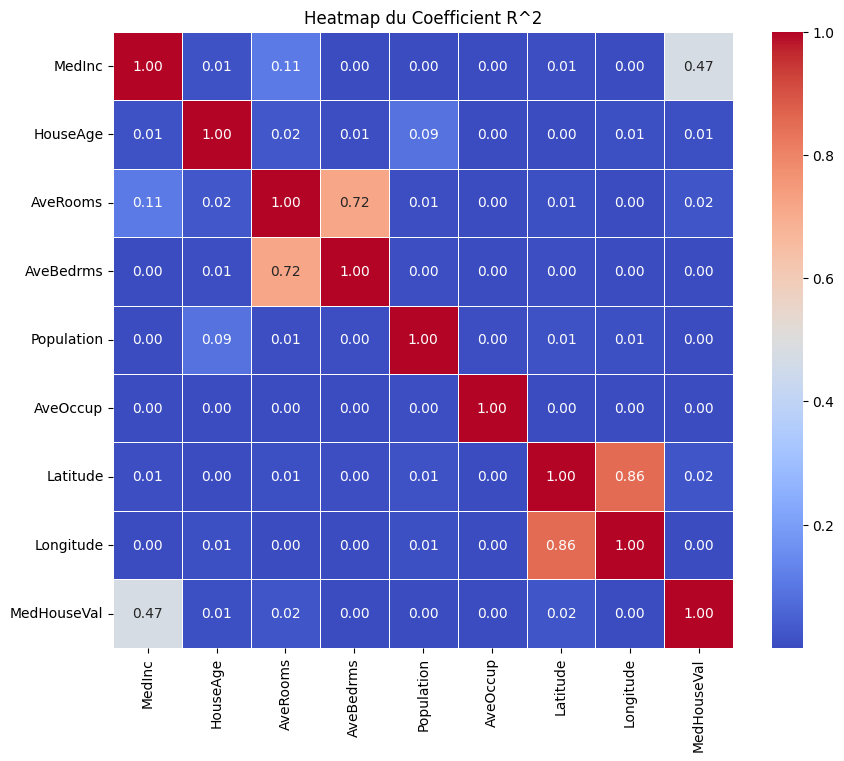

In [90]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

correlation_matrix = df.corr()
r_squared_matrix = correlation_matrix ** 2

plt.figure(figsize=(10, 8))
sns.heatmap(r_squared_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap du Coefficient R^2")
plt.show()
